In [385]:
import pandas as pd

In [386]:
df = pd.read_csv("titanic.csv")

In [387]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


from the above all the column in the data set we only use the necessary column that is usefull for our model

In [388]:
df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

In [389]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


# now we perform the analysis using the graphs

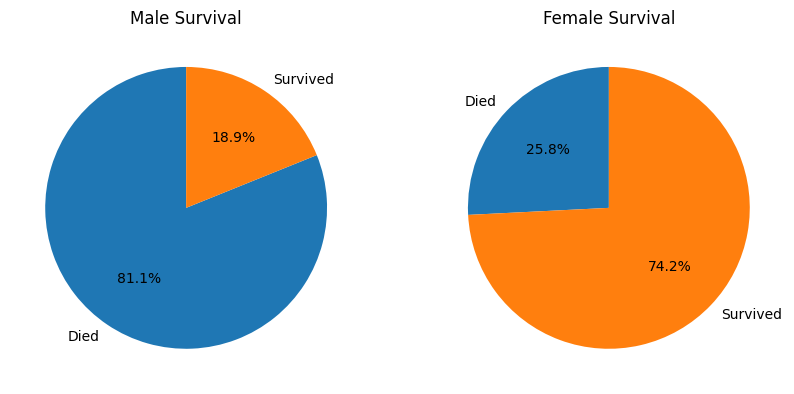

In [390]:

import matplotlib.pyplot as plt
sex_survival = df.groupby(['Sex', 'Survived'])['Survived'].count().unstack()
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].pie(sex_survival.loc['male'], labels=['Died', 'Survived'], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Male Survival')
axes[1].pie(sex_survival.loc['female'], labels=['Died', 'Survived'], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Female Survival')
plt.show()


This shows that the 81 percent of the man died during the titanic ship accident while the 74 percent women survived

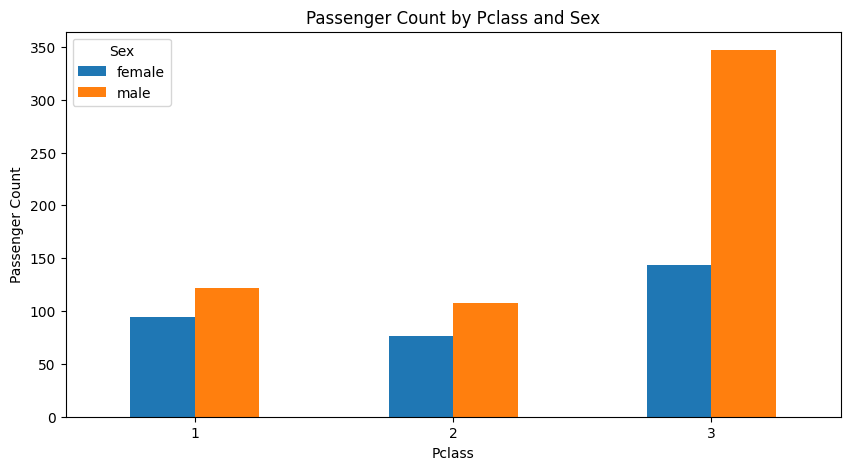

In [391]:

pclass_sex_counts = df.groupby(['Pclass', 'Sex'])['Sex'].count().unstack()
pclass_sex_counts.plot(kind='bar', figsize=(10, 5))
plt.title('Passenger Count by Pclass and Sex')
plt.xlabel('Pclass')
plt.ylabel('Passenger Count')
plt.xticks(rotation=0)
plt.legend(title='Sex')
plt.show()


this shows that the most of the male traveled in pclass 3 , that's why they didnot survived
note: As we know that the pclass 3 is the last class

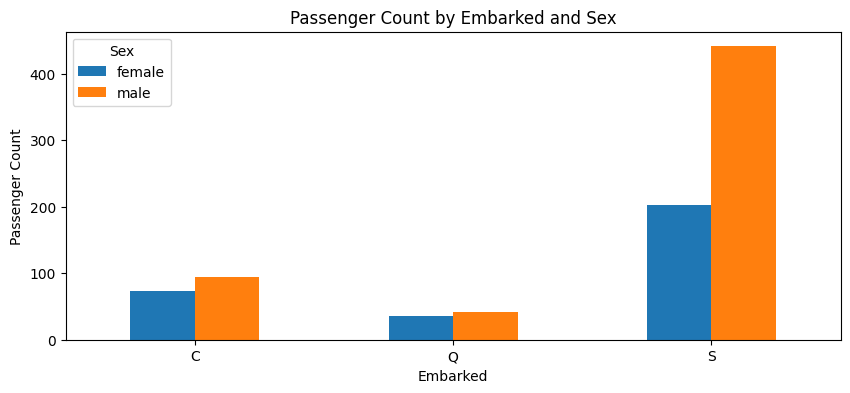

In [392]:


embarked_sex_counts = df.groupby(['Embarked', 'Sex'])['Sex'].count().unstack()
embarked_sex_counts.plot(kind='bar', figsize=(10, 4))
plt.title('Passenger Count by Embarked and Sex')
plt.xlabel('Embarked')
plt.ylabel('Passenger Count')
plt.xticks(rotation=0)
plt.legend(title='Sex')
plt.show()


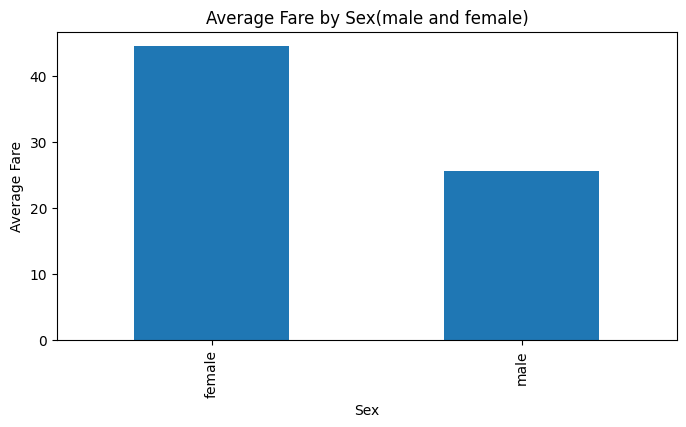

In [393]:

fare_by_sex = df.groupby('Sex')['Fare'].mean()
fare_by_sex.plot(kind='bar', figsize=(8, 4))
plt.title('Average Fare by Sex(male and female)')
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.show()


These are some insights that we got from data , this is necessary for our knowledge to train our model

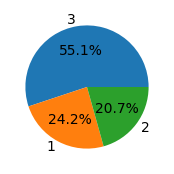

In [408]:
plt.figure(figsize=(4,2))
plt.pie(df['Pclass'].value_counts(), labels=df['Pclass'].unique(), autopct='%1.1f%%')
plt.show()

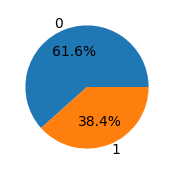

In [409]:
plt.figure(figsize=(4,2))
plt.pie(df['Survived'].value_counts(), labels=df['Survived'].unique(), autopct='%1.1f%%')
plt.show()

# data pre-processing starts here

In [394]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


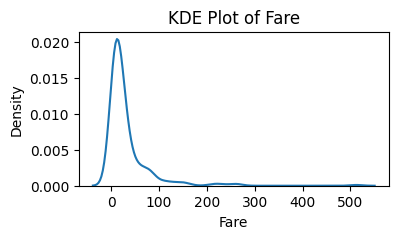

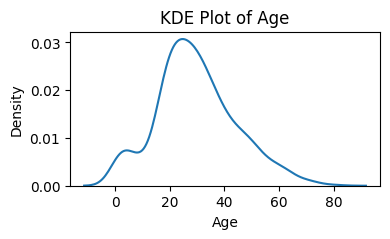

In [395]:


import seaborn as sns

# KDE plot for Fare
plt.figure(figsize=(4, 2))
sns.kdeplot(data=df, x='Fare')
plt.title('KDE Plot of Fare')
plt.xlabel('Fare')
plt.show()

# KDE plot for Age
plt.figure(figsize=(4, 2))
sns.kdeplot(data=df, x='Age')
plt.title('KDE Plot of Age')
plt.xlabel('Age')
plt.show()


from the above graph we see that the fare column is skewed , so we perform the log transform to make the it normaly distributed


In [396]:

import numpy as np
df['Fare'] = np.log1p(df['Fare'])




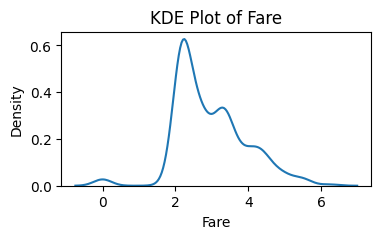

In [397]:
plt.figure(figsize=(4, 2))
sns.kdeplot(data=df, x='Fare')
plt.title('KDE Plot of Fare')
plt.xlabel('Fare')
plt.show()

now we can clearly see that our fare column is most likely normally distributed

In [398]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [399]:
x = df.drop("Survived",axis=1)
y = df["Survived"]

In [400]:
# split the column into the x train and y train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [401]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import StandardScaler



In [402]:

trf1 = ColumnTransformer([
    ('impute_age',SimpleImputer(),[2]),
    ('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])
],remainder='passthrough')


trf2 = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder( drop="first",sparse_output=False,handle_unknown='ignore'),[1,6])
],remainder='passthrough')


trf3 = ColumnTransformer([
    ('scale',StandardScaler(),slice(0,8))
])



"""# Create Pipeline"""

pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),


])

In [403]:
x_train = pipe.fit_transform(x_train)
x_test = pipe.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [410]:
x_train

array([[-0.30335547,  0.59248936, -0.03750293, ..., -0.03750293,
        -0.03750293, -0.05307449],
       [-0.30335547,  0.59248936, -0.03750293, ..., -0.03750293,
        -0.03750293, -0.05307449],
       [-0.30335547,  0.59248936, -0.03750293, ..., -0.03750293,
        -0.03750293, -0.05307449],
       ...,
       [-0.30335547,  0.59248936, -0.03750293, ..., -0.03750293,
        -0.03750293, -0.05307449],
       [-0.30335547,  0.59248936, -0.03750293, ..., -0.03750293,
        -0.03750293, -0.05307449],
       [-0.30335547,  0.59248936, -0.03750293, ..., -0.03750293,
        -0.03750293, -0.05307449]])

In [404]:


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}


for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: Accuracy = {accuracy:.2f}')


Logistic Regression: Accuracy = 0.63
Decision Tree: Accuracy = 0.63
Random Forest: Accuracy = 0.63
Support Vector Machine: Accuracy = 0.63
K-Nearest Neighbors: Accuracy = 0.63
Naive Bayes: Accuracy = 0.41


In [406]:

from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),

    ('knn', KNeighborsClassifier()),

], voting='hard')


voting_model.fit(x_train, y_train)


y_pred = voting_model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Voting Ensemble Accuracy: {accuracy:.2f}')


Voting Ensemble Accuracy: 0.63
